
Для работы с данными PyTorch располагает двумя примитивами: `Dataset` хранит образцы и соответствующие им метки; `DataLoader` является оберткой, позволяющей производить итерационные манипуляции, такие как выборка партий, перемешивание и параллельную загрузку данных.


# Download Data

PyTorch предлагает специализированные библиотеки, которые включают датасеты: [TorchText](https://pytorch.org/text/stable/index.html), [TorchVision](https://pytorch.org/vision/stable/index.html) и [TorchAudio](https://pytorch.org/audio/stable/index.html).

Загрузим Fashion MNIST из TorchVision. Модуль `torchvision.datasets` содержит объекты класса `Dataset` для большинства популярных данных с изображениями, такие как CIFAR, COCO и [другие](https://pytorch.org/vision/stable/datasets.html).

In [23]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

В аргументе `root` указывается директория, в которую будут загружены данные. В аргумент `transform` передается объект класса `ToTensor`, который произведет преобразование исходных изображений (в формате [PIL](https://pillow.readthedocs.io/en/stable/)) в `FloatTensor`. В поле `train` определяется тренировочный или тестовый датасет.

In [31]:
# Download training data from open datasets.
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

>Все датасеты TorchVision имеют также аргумент `target_transform` для модификации меток. Этот параметр принимает функцию, в которой реализована логика преобразования. Несколько наиболее часто используемых преобразователей представлены в модуле [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html). Пример использования lambda функции для one-hot encoding [здесь](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html#transforms). Способы преобразования и аугментации изображений описаны [здесь](https://pytorch.org/vision/stable/transforms.html).

Переменные `train_data` и `test_data` содержат объекты класса `FashionMNIST`. Они позволяют получить доступ к загруженным данным. Сами данные хранятся в директории, указанной в `root`. Класс `FashionMNIST` наследуется от базового класса `Dataset`.


Для собственных данных можно [создать пользовательский класс](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) на базе `Dataset`.

In [ ]:
datasets.FashionMNIST.__mro__   # цепочка наследования

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.MNIST,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [48]:
train_data  # метаданные 

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Функция `len()` вернет количество образцов в датасете:

In [66]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
test_data.classes   # список названий классов

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Load Data

## Lazy Loading

При обращении к конкретному элементу объекта класса `Dataset` производится загрузка образца в программу, т.е. используется **ленивая загрузка** (*lazy loading*) – загрузка образца в ОЗУ производится при первом обращении к нему. Изображение можно визуализировать функцией `plt.imshow()`.

>метод `squeeze()` объекта класса `torch.Tensor()` удаляет все оси тензора, размер которых равен 1. 

<class 'torch.Tensor'> <class 'int'>


(-0.5, 27.5, 27.5, -0.5)

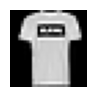

In [51]:
import matplotlib.pyplot as plt

img, label = train_data[1]  # получение первого элемента из train_data

print(type(img), type(label))

plt.figure(figsize=(1, 1))  # создание фигуры для отображения
plt.imshow(img.squeeze(), cmap="gray")  # отображение изображения
plt.axis("off")  # отключение осей

Получить доступ ко всему набору разом можно обратившись к полю `data` объекта класса `Dataset`. При этом произойдет загрузка всего набора данных в ОЗУ. Доступ к соотетствующим меткам можно получить в поле `targets`.

In [87]:
# test_data.data
# test_data.targets

## `DataLoader`

Для загрузки образцов в программу партиями используется класс `DataLoader`. Передадим `train_data` и `test_data` в конструктор класса `DataLoader`. Таким образом, мы создадим итерируемую обертку над данными. Также в конструктор передадим размер партии (`batch_size`) и если нужно перетасовать данные, установим `shuffle=True`. На этом этапе данные еще не загружаются в ОЗУ. 

Загрузка данных в ОЗУ осуществляется при итерировании объекта класса `DataLoader`. Здесь также используется ленивая загрузка, поэтому на каждой итерации загружается только одна партия из `batch_size` образцов и их меток. Причем загрузка может производиться в фоновом процессе, если `num_workers > 0`.

>Так как объект класса `DataLoader` является итерируемым, можно получить из него итератор (функцией `iter()`) и итерировать его при помощи функций `next()` и `iter()`.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data,
                              batch_size=batch_size,
                              num_workers=1,
                              shuffle=True,
                              )
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Iterate and print the shape of the data.
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


- `N` – число образцов
- `C` – количество каналов
- `H` – высота изображений
- `W` – ширина изображений

In [73]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

В поле `dataset` объекта класса `DataLoader` содержится ссылка на исходный датасет (объект класса `Dataset`), по которому создавалась обертка:

In [74]:
train_dataloader.dataset is train_data

True

Подробнее о данных в PyTorch можно почитать [здесь](https://pytorch.org/docs/stable/data.html).